# Antonia's Final Notebeook

## Importing Census Data

In [25]:
#general data wrangling tasks
import pandas as pd
#read and visualize spatial data
import geopandas as gpd
#providing basemaps
import contextily as ctx
#give power to plots
import matplotlib.pyplot as plt

In [26]:
#loading geojson file
gdfox=gpd.read_file('oxnardcensus.geojson')
gdfla=gpd.read_file('lacensus.geojson')

## Racial Composition of Oxnard, CA and Los Angeles, CA

In [27]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [28]:
# redefine gdf with only columns to keep
gdfox = gdfox[columns_to_keep]
# redefine gdf with only columns to keep
gdfla = gdfla[columns_to_keep]

In [29]:
#rename column headers with race
gdfox.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

#rename column headers with race
gdfla.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [30]:
#add percent columns for each race
gdfox['Percent Non Hispanic White'] = gdfox['Non Hispanic White']/gdfox['Total']*100
gdfox['Percent Non Hispanic Black'] = gdfox['Non Hispanic Black']/gdfox['Total']*100
gdfox['Percent Non Hispanic American Indian and Alaska Native'] = gdfox['Non Hispanic American Indian and Alaska Native']/gdfox['Total']*100
gdfox['Percent Non Hispanic Asian'] = gdfox['Non Hispanic Asian']/gdfox['Total']*100
gdfox['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdfox['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdfox['Total']*100
gdfox['Percent Non Hispanic Some other race'] = gdfox['Non Hispanic Some other race']/gdfox['Total']*100
gdfox['Percent Non Hispanic Two or more races'] = gdfox['Non Hispanic Two or more races']/gdfox['Total']*100
gdfox['Percent Hispanic'] = gdfox['Hispanic']/gdfox['Total']*100

#add percent columns for each race
gdfla['Percent Non Hispanic White'] = gdfla['Non Hispanic White']/gdfla['Total']*100
gdfla['Percent Non Hispanic Black'] = gdfla['Non Hispanic Black']/gdfla['Total']*100
gdfla['Percent Non Hispanic American Indian and Alaska Native'] = gdfla['Non Hispanic American Indian and Alaska Native']/gdfla['Total']*100
gdfla['Percent Non Hispanic Asian'] = gdfla['Non Hispanic Asian']/gdfla['Total']*100
gdfla['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdfla['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdfla['Total']*100
gdfla['Percent Non Hispanic Some other race'] = gdfla['Non Hispanic Some other race']/gdfla['Total']*100
gdfla['Percent Non Hispanic Two or more races'] = gdfla['Non Hispanic Two or more races']/gdfla['Total']*100
gdfla['Percent Hispanic'] = gdfla['Hispanic']/gdfla['Total']*100

Text(0.5, 1.0, 'Percent Non Hispanic White')

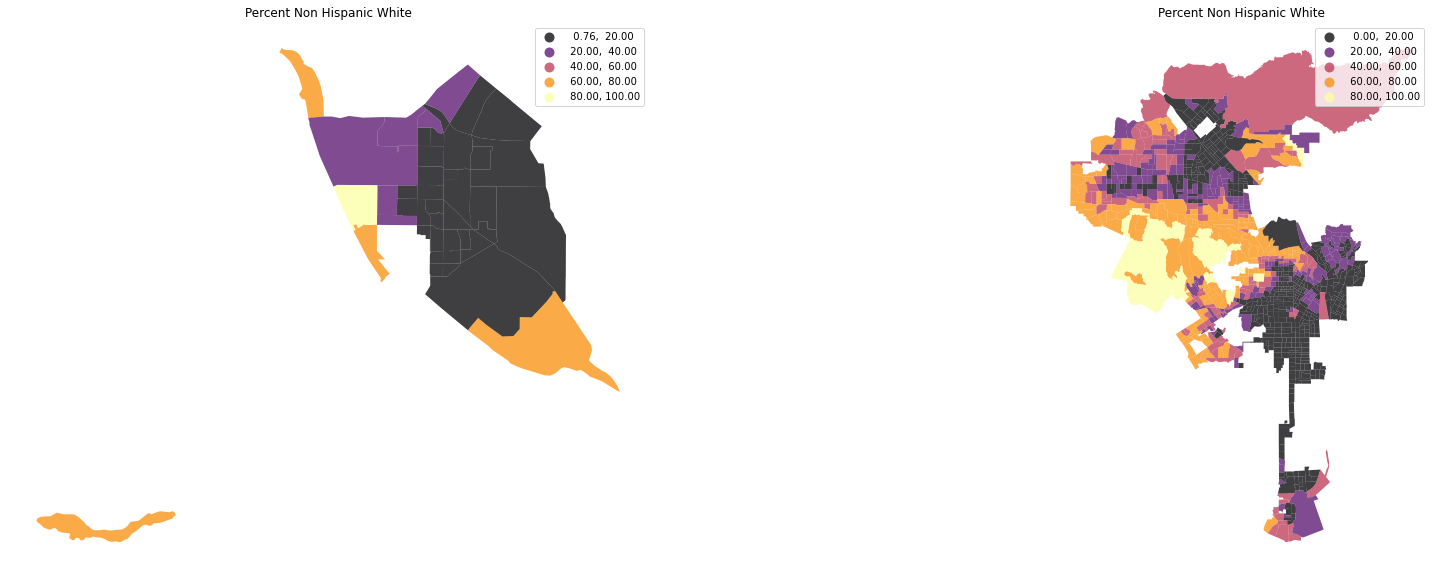

In [31]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

# name each subplot
ax1, ax2 = axs

# percent non hispanic map in Oxnard on the left
gdfox.plot(column='Percent Non Hispanic White', 
            cmap='inferno', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic White")

# percent non hispanic map in LA on the right
gdfla.plot(column='Percent Non Hispanic White', 
            cmap='inferno', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

These maps support the idea that fewer Non-Hispanic Whites and more minority residents live near toxic release facilities (the darker colored areas on the map), evident in the latter maps that locate the facilities. 

## Mapping Building Types Around Each Oxnard Facility Type

In [32]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [33]:
#creating list of facility addresses
address = ["5936 Perkins Road, Oxnard, Ventura County, California, 93033, United States", "548 Diaz Avenue, Oxnard, Ventura County, California, 93030, United States", '2340, Eastman Avenue, Oxnard, Ventura County, California, 93030, United States',"501, N Del Norte Boulevard, Oxnard, Ventura County, California, 93030, United States", "800, N Rice Avenue, Oxnard, Ventura County, California, 93030, United States", "392, East Vineyard Avenue, Oxnard, Ventura County, California, 93036, United States", "392, S. Del Norte Boulevard, Oxnard, Ventura County, California, 93030, United States", "6029, Vineyard Avenue, Oxnard, Ventura County, California, 93030, United States"]
#Aluminum Precision Products INC address is not geocoded, 1001, E McWane Bouvelard, Oxnard, Ventura County, California, 93033, United States

#creating list of facility names
name = ["New-Indy Oxnard LLC", "Cemex Oxnard LLC", "Parker Hannifin Corp", "PTI Technologies Inc", "The Procter & Gamble Paper Product CO", "Southern Counties Oil CO LP DBA SC Fuels", "Associated Ready Mixed Concrete Inc", "Vulcan Materials-Saticoy"]

In [34]:
#creating empty dataframe
title = pd.DataFrame()
#add facility addresses to dataframe as a column
title['address'] = address
#add facility names to dataframe as a column
title['name'] = name

In [36]:
#created dataframe
title

,address,name
0,"5936 Perkins Road, Oxnard, Ventura County, Cal...",New-Indy Oxnard LLC
1,"548 Diaz Avenue, Oxnard, Ventura County, Calif...",Cemex Oxnard LLC
2,"2340, Eastman Avenue, Oxnard, Ventura County, ...",Parker Hannifin Corp
3,"501, N Del Norte Boulevard, Oxnard, Ventura Co...",PTI Technologies Inc
4,"800, N Rice Avenue, Oxnard, Ventura County, Ca...",The Procter & Gamble Paper Product CO
5,"392, East Vineyard Avenue, Oxnard, Ventura Cou...",Southern Counties Oil CO LP DBA SC Fuels
6,"392, S. Del Norte Boulevard, Oxnard, Ventura C...",Associated Ready Mixed Concrete Inc
7,"6029, Vineyard Avenue, Oxnard, Ventura County,...",Vulcan Materials-Saticoy


In [37]:
# function to create a map using open street map
def make_building_map(address, name):
    
    # get the data from osm
    osm = ox.geometries_from_address(address,
                            tags={'building':True},
                                    dist = 2000)
    
    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)
    gdf_web_mercator = gdfox.to_crs(epsg=3857)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(10,15))
    
    # add the map
    osm_web_mercator.plot(ax=ax,
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
    
    
   
    # add facility names as the title
    ax.set_title('One Mile Radius of Building Types Around ' + name)

    # get rid of the axis
    ax.axis('off')
    
    # add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=15)

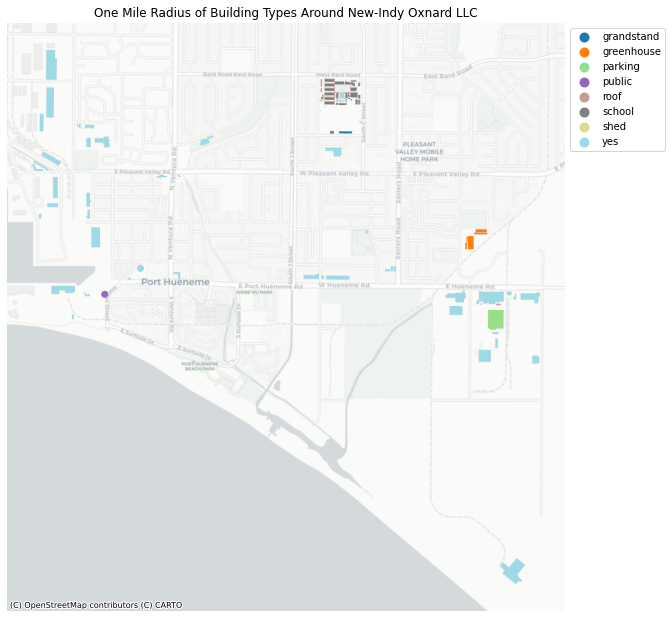

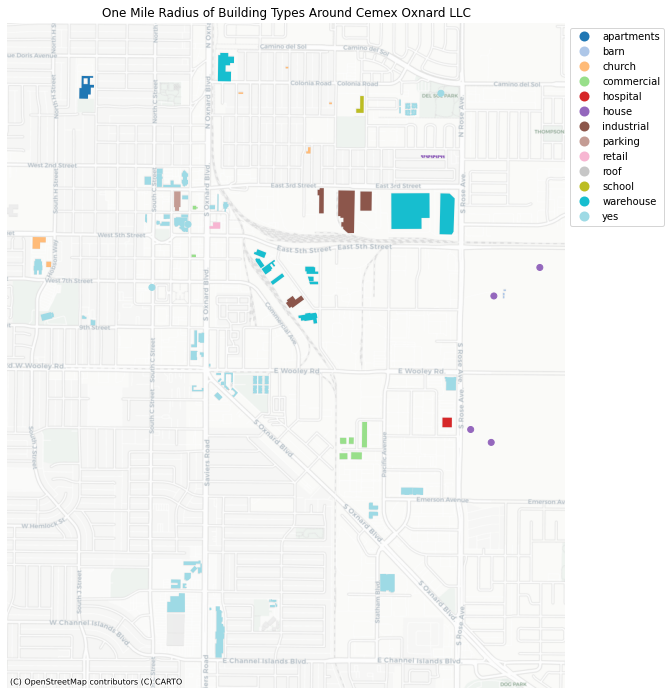

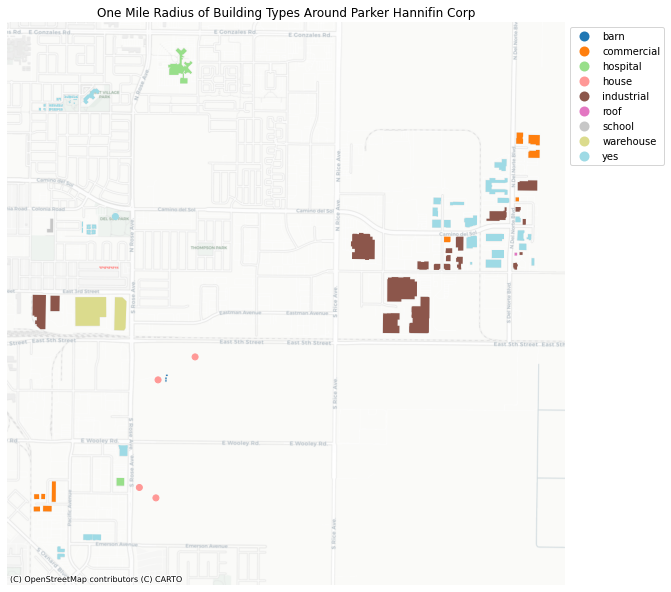

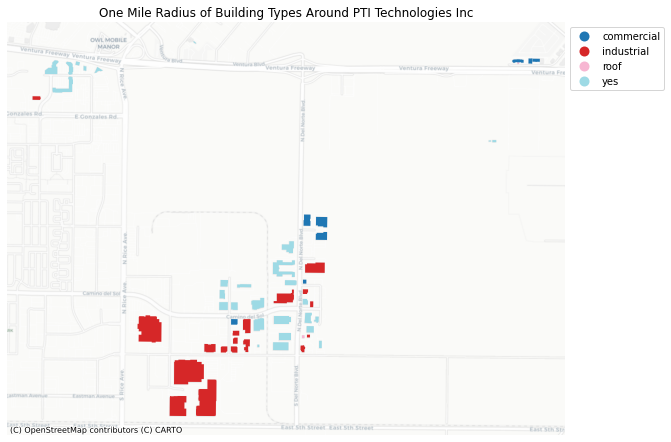

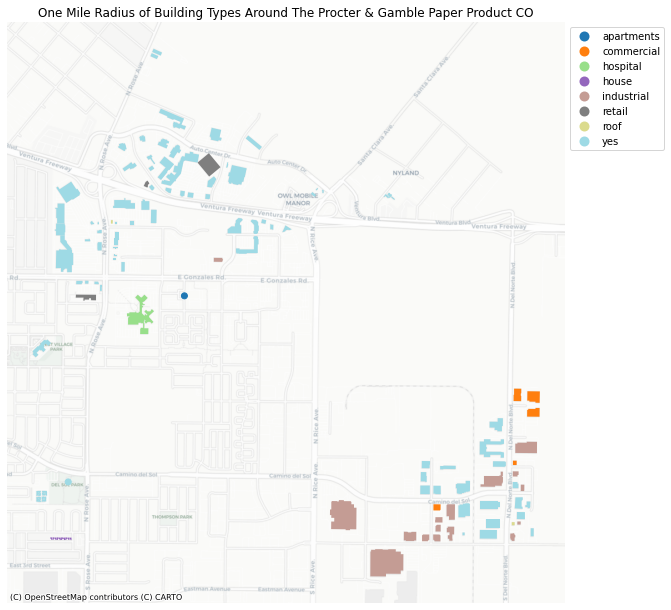

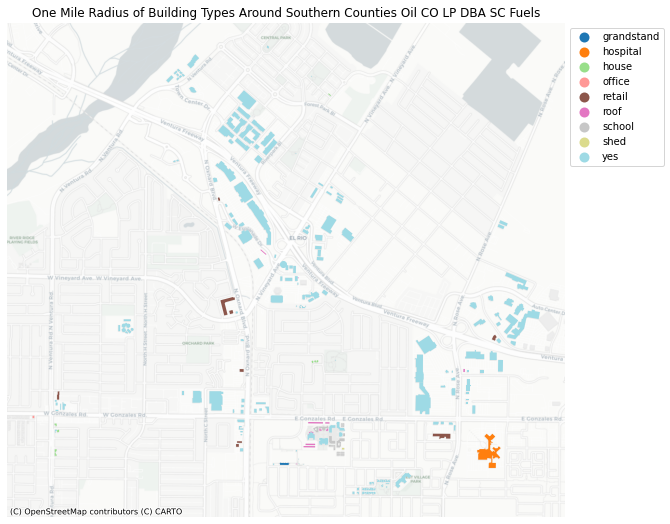

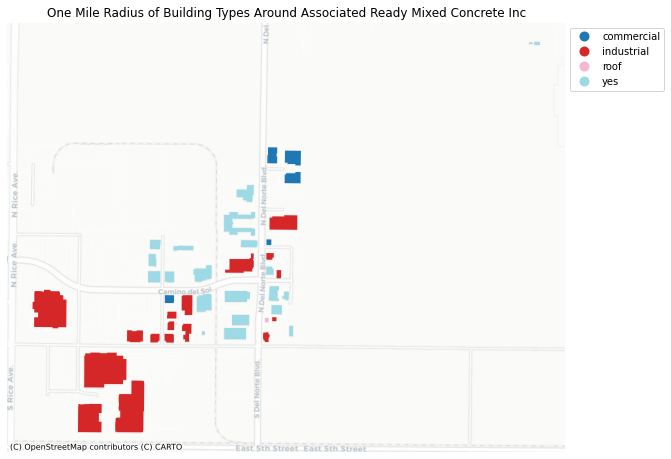

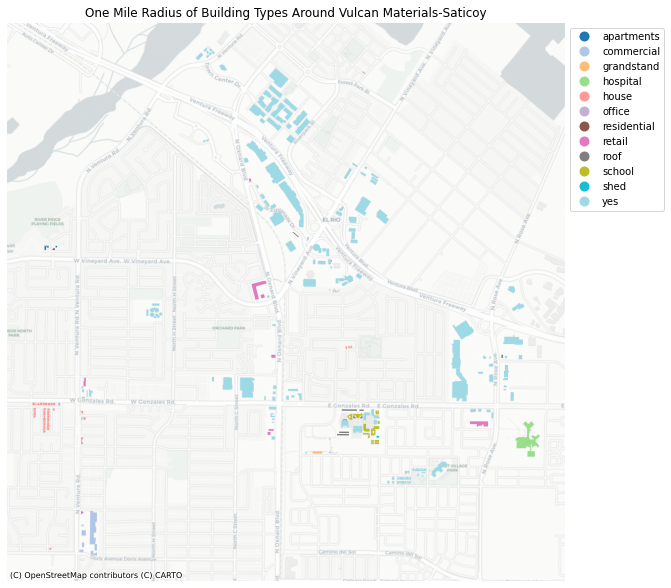

In [38]:
#call function as a loop and print maps
for index, row in title.iterrows():
    make_building_map(row['address'], row['name'])

Although Open Street Maps data is limited in building types, these maps show the recorded buildings within a little over a mile (2000 meters) radius of the facilities. Residences, apartments, and houses are around most of the facilities. And we are also able to see non-residential buildings such as schools are at risk of coming in contact with facility-released waste. Teachers and students spend ample time in those buildings, meaning they have a greater likelihood of having health effects from consistent and constant exposure to waste. 

## Importing Oxnard, CA Toxic Release Facilities Data

In [39]:
#name dataset as pd and read/show dataset
dfox=pd.read_csv('updatedoxnard_trisummary2020 - Sheet1-5.csv')

In [40]:
# converting df to gdf
gdfox = gpd.GeoDataFrame(dfox, crs='epsg:4326', geometry=gpd.points_from_xy(dfox.Longitude, dfox.Latitude)) 

In [41]:
#geometry put the longitude and latitide points together in new column as object types
gdfox

,Longitude,Latitude,Name,Address,Industry Sector,Releases (lb),Releases (lb) Mean,geometry
0,-119.183020,34.140350,New-Indy Oxnard LLC,"5936 Perkins Road, Oxnard, CA 93033",Paper,"10,001-100,000",55000.5,POINT (-119.18302 34.14035)
1,-119.168445,34.141707,Aluminum Precision Products INC,"1001 MC Wane Bouvelard, Oxnard, CA 93033",Fabricated Metals,"101-10,000",5050.5,POINT (-119.16845 34.14171)
2,-119.168110,34.196130,Cemex Oxnard Plant,"548 Diaz Avenue, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.16811 34.19613)
3,-119.147180,34.198100,Parker Hannifin Corp,"2340 Eastman Ave, Oxnard, CA 93030",Machinery,"10,001-100,000",55000.5,POINT (-119.14718 34.19810)
4,-119.130352,34.205928,PTI Technologies Inc,"501 N Del Norte Boulevard, Oxnard, CA 93030",Transportation Equipment,"101-10,000",5050.5,POINT (-119.13035 34.20593)
5,-119.140427,34.209468,The Procter & Gamble Paper Product CO,"800 N Rice Avenue, Oxnard, CA 93030",Paper,"101-10,000",5050.5,POINT (-119.14043 34.20947)
6,-119.163291,34.249140,Southern Counties Oil CO LP DBA SC Fuels,"3815 East Vineyard Avenue, Oxnard, CA 93036",Petroleum Bulk Terminals,"101-10,000",5050.5,POINT (-119.16329 34.24914)
7,-119.129346,34.199354,Associated Ready Mixed Concrete Inc,"392 S. Del Norte Boulevard, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.12935 34.19935)
8,-119.143053,34.270536,Vulcan Materials-Saticoy,"6029 Vineyard Avenue, Oxnard, CA 93030",Petroleum,>0-100,50.0,POINT (-119.14305 34.27054)


## Chart Difference in Waste Release per Facility in Oxnard, CA

In [42]:
#remove all unnecessary columns
newdata=dfox.drop(['Longitude','Latitude', 'Address', 'Industry Sector', 'Releases (lb)', 'geometry'], axis = 1)

In [43]:
#name new dataframe with name as index and not as"0,1,2.."
dfoxx=newdata.set_index("Name")

In [44]:
#FYI:Releases (lb) Mean Labels
#10,001-100,000lb=55,000.5lb
#101-10,000lb=5,050.5lb
#>0-100lb=50lb
#0lb=0lb

In [45]:
dfoxx

,Releases (lb) Mean
Name,
New-Indy Oxnard LLC,55000.5
Aluminum Precision Products INC,5050.5
Cemex Oxnard Plant,0.0
Parker Hannifin Corp,55000.5
PTI Technologies Inc,5050.5
The Procter & Gamble Paper Product CO,5050.5
Southern Counties Oil CO LP DBA SC Fuels,5050.5
Associated Ready Mixed Concrete Inc,0.0
Vulcan Materials-Saticoy,50.0


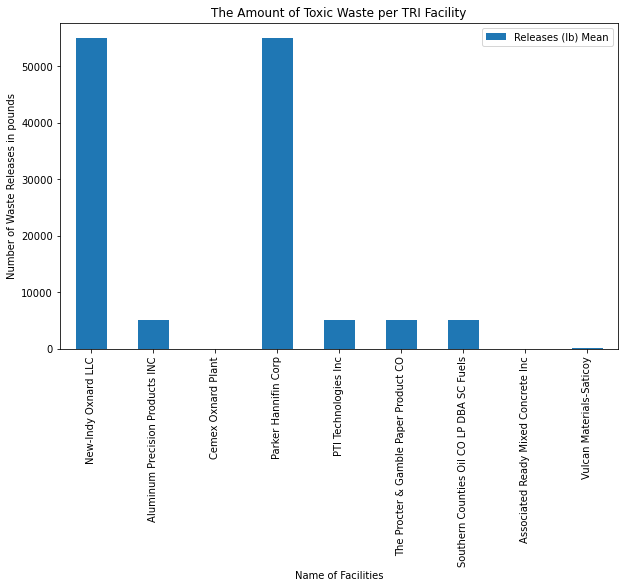

In [46]:
#plot edited dataframe as bar graph
dfoxx.plot(figsize=(10, 6), kind='bar')

#customize graph features to add x and y labels, title, and position graph legend
plt.ylabel('Number of Waste Releases in pounds')
plt.xlabel('Name of Facilities')
plt.title('The Amount of Toxic Waste per TRI Facility')
plt.legend(loc='upper right')

#display customized graph
plt.show()

The bar graph allows us to compare the amount of waste each Oxnard facility releases visually. The highest weight releasing facilities are New-Indy Oxnard LLC and Parker Hannifan Corp. 